In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [ ]:
salary_df = pd.read_csv("Salary_dataset.csv")
salary_df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [ ]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [ ]:
salary_df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


## Menghilangkan ID

In [ ]:
salary_df =  salary_df.drop(["Unnamed: 0"], axis=1)

## Check Null Value

In [ ]:
year = (salary_df.YearsExperience == 0).sum()
salary = (salary_df.Salary == 0).sum()

print("Nilai 0 di kolom year ada: ", year)
print("Nilai 0 di kolom salary ada: ", salary)

Nilai 0 di kolom year ada:  0
Nilai 0 di kolom salary ada:  0


In [ ]:
salary_df.isnull().sum()

,0
YearsExperience,0
Salary,0


## Check Outlier

<Axes: xlabel='YearsExperience'>

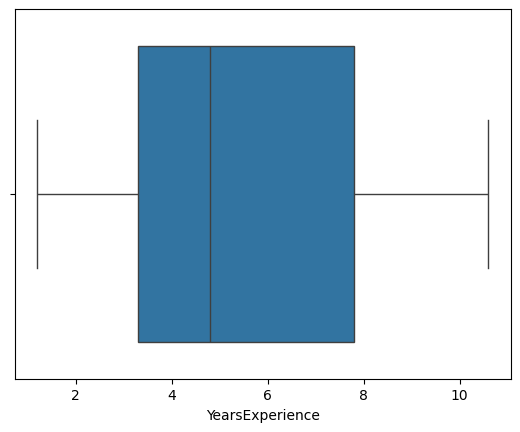

In [ ]:
sns.boxplot(x=salary_df['YearsExperience'])

<Axes: xlabel='Salary'>

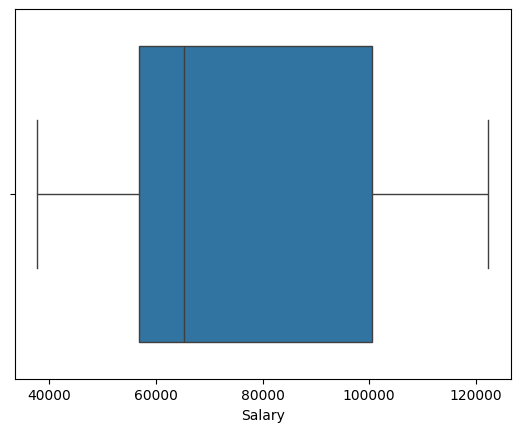

In [ ]:
sns.boxplot(x=salary_df['Salary'])

Tidak ada Outlier, AMAN

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

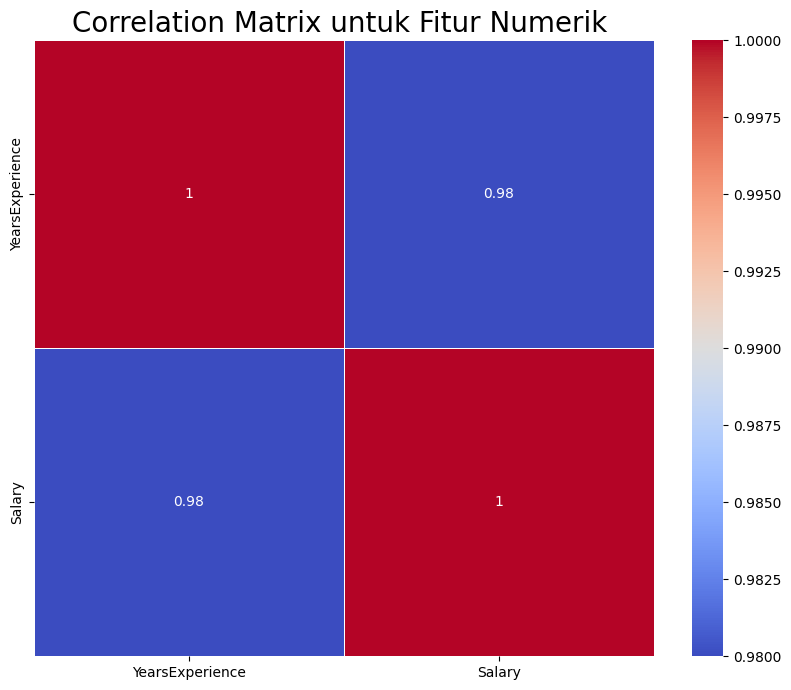

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = salary_df.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

## Split Training

In [ ]:
from sklearn.model_selection import train_test_split

X = salary_df.drop(["Salary"],axis =1)
y = salary_df["Salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting', 'Linear Regression'])

## Pembuatan Model

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def regression_metrics(prediction, y_test):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score
kfold = KFold(n_splits=4, shuffle=True, random_state=42)
model_knn = KNeighborsRegressor()

# Define the hyperparameter grid
tuned_params = [{'n_neighbors': [1, 2, 3, 4,5,6, 7, 10], 'metric': ['manhattan', 'euclidean']}]

print("Tuning hyper-parameters for KNN Regression")
print()

# Assuming you have defined 'kfold'
clfKNN = GridSearchCV(
    model_knn,
    tuned_params,
    scoring='r2',
    cv=kfold,
    verbose=2
)

clfKNN.fit(X_train, y_train)

print()
print("Best parameters set found on development set:")
print(clfKNN.best_params_)
print()
print("Detailed regression report:")
y_true, y_pred = y_test, clfKNN.predict(X_test)

# Evaluate the model using mean squared error
regression_metrics(y_pred, y_true)

Tuning hyper-parameters for KNN Regression

Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV] END ....................metric=manhattan, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=manhattan, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=manhattan, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=manhattan, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=manhattan, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=manhattan, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=manhattan, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=manhattan, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=manhattan, n_neighbors=3; total time=   0.0s
[CV] END ....................metric=manhattan, n_neighbors=3; total time=   0.0s
[CV] END ....................metric=manhattan, n_neighbors=3; total time=   0.0s
[CV]

In [ ]:
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=clfKNN.predict(X_train), y_true=y_train)

## Random Forest Regressor

In [ ]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score
model_forest = RandomForestRegressor()

# Define the hyperparameter grid
tuned_params = [{
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}]

print("Tuning hyper-parameters for Random Forest Regression")
print()

# Assuming you have defined 'kfold'
clfRandomForest= GridSearchCV(
    model_forest,
    tuned_params,
    scoring='r2',
    cv=5,
    verbose=2
)

clfRandomForest.fit(X_train, y_train)

print()
print("Best parameters set found on development set:")
print(clfRandomForest.best_params_)
print()
print("Detailed regression report:")
y_true, y_pred = y_test, clfKNN.predict(X_test)

# Evaluate the model using mean squared error
regression_metrics(y_pred, y_true)

Tuning hyper-parameters for Random Forest Regression

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_l

In [ ]:
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=clfRandomForest.predict(X_train), y_true=y_train)

## Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score
model_forest = GradientBoostingRegressor(random_state=42)

# Define the hyperparameter grid
tuned_params = [{
     'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 1.0],
}]

print("Tuning hyper-parameters for Boosting Regressor")
print()

# Assuming you have defined 'kfold'
clfBoosting= GridSearchCV(
    model_forest,
    tuned_params,
    scoring='r2',
    cv=5,
    verbose=2
)

clfBoosting.fit(X_train, y_train)

print()
print("Best parameters set found on development set:")
print(clfBoosting.best_params_)
print()
print("Detailed regression report:")
y_true, y_pred = y_test, clfBoosting.predict(X_test)

# Evaluate the model using mean squared error
regression_metrics(y_pred, y_true)

Tuning hyper-parameters for Boosting Regressor

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_spli

In [ ]:
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=clfBoosting.predict(X_train), y_true=y_train)

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print("Detailed regression report:")
y_true, y_pred = y_test, lin_reg.predict(X_test)

# Evaluate the model using mean squared error
regression_metrics(y_pred, y_true)
models.loc['train_mse','Linear Regression'] = mean_squared_error(y_pred=lin_reg.predict(X_train), y_true=y_train)

Detailed regression report:
MAE: 6286.453830757742
MSE: 49830096.85590836
RMSE: 7059.043621901507
R_squared: 0.9024461774180498


In [ ]:
models.loc['train_mse','Linear Regression'] = mean_squared_error(y_pred=lin_reg.predict(X_train), y_true=y_train)

## Evaluasi

In [ ]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting', 'Linear Regression'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': clfKNN, 'RF': clfRandomForest, 'Boosting': clfBoosting, 'Linear Regression': lin_reg}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse


,train,test
KNN,20623.275984,44894.692646
RF,12324.283955,50821.791773
Boosting,6261.424328,75330.400641
Linear Regression,27102.249731,49830.096856


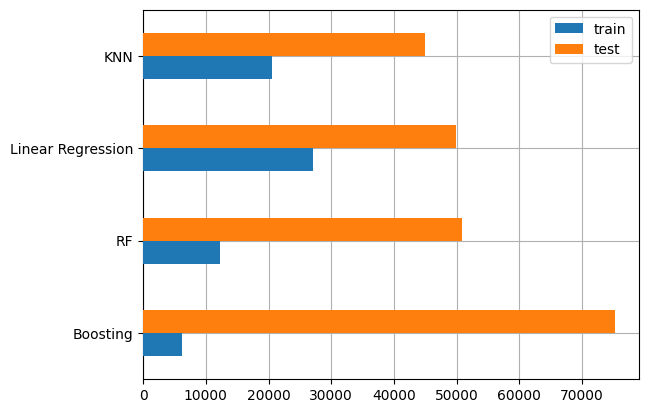

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)